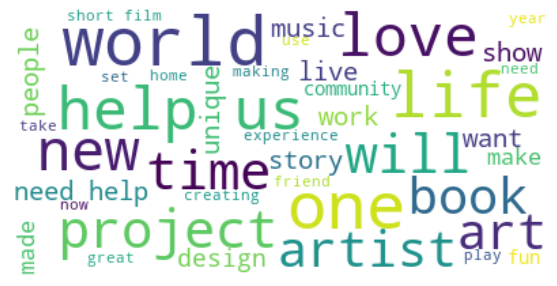

In [15]:
wordcloud = WordCloud(max_font_size=50, max_words=40,background_color="white").generate(text.lower())
plt.figure(figsize=(12,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

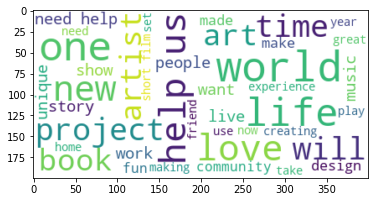

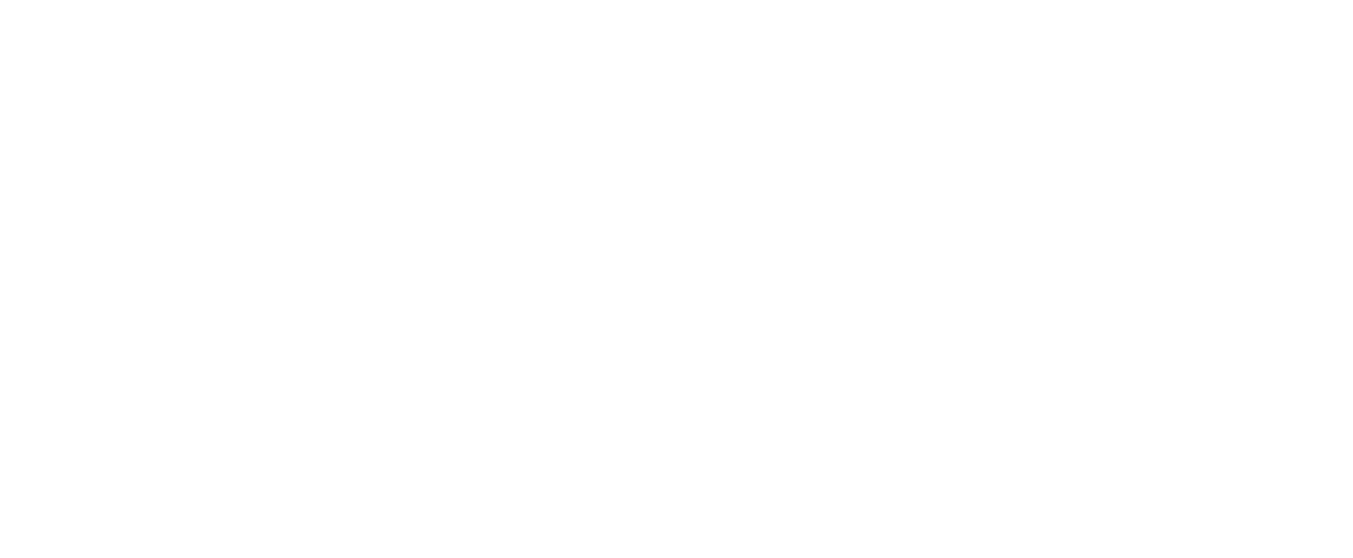

In [11]:
import pandas as pd
dataset=pd.read_csv("df_text_eng.csv")
dataset=dataset.dropna()
dataset['blurb'] = dataset['blurb'].astype(str)

from wordcloud import WordCloud 
import matplotlib.pyplot as plt
text=""
for i in range(len(dataset.blurb)):
    if i==44343 or i==62766 or i==97999:
        continue
    text=text+str(dataset.blurb[i])
    
wordcloud = WordCloud(max_font_size=50, max_words=40,background_color="white").generate(text.lower())
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(figsize=(24,10))
plt.axis("off")
plt.show()

In [11]:
# Import data, prep-process it and split into test and training sets

import pandas as pd
dataset=pd.read_csv("df_text_eng.csv")
dataset['blurb'] = dataset['blurb'].astype(str)

import re
import nltk
from nltk.corpus import stopwords #import words that are non-essential to text sentiment
from nltk.stem.porter import PorterStemmer 
corpus=[]

dataset["condtion"]=[0 if word=="failed" else 1 for word in dataset["state"]]


for i in range(0,len(dataset['blurb'])):
    review=re.sub("[^a-zA-Z]"," ",dataset["blurb"][i]) #remove punctuation and numbers from words
    review=review.lower() #convert all letters to lower
    review=review.split() #split words in sentence into different strings in a list
    ps=PorterStemmer() 
    review=[ps.stem(word) for word in review if not word in set(stopwords.words("english"))] #keep words not in stopwords, and stem word into root words
    review=" ".join(review) #join by all the words into a string, separated by " "
    corpus.append(review) #add all reviews into the list defined as "corpus"
    
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=2500) #Keep top 2500 most frequently used words
X=cv.fit_transform(corpus).toarray() #Develop a sparse matrix for every word
y=dataset.iloc[0:len(dataset['blurb']),3].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Fitting Logistic Regression to the Training set


from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

pred=classifier.predict_proba(X_test)[:,1]
pred=pred>0.75
pred=pred.astype(int)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)
cm[1,1]/(cm[0,1]+cm[1,1])

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.815179806362379